In [31]:
# Employee Performance Dataset: Unsupervised Learning Project
# Problem Description:
# The goal of this project is to perform an unsupervised learning analysis on an employee performance dataset. The dataset contains several features that reflect employee characteristics, and the task is to cluster employees into groups based on their performance. This can help identify performance patterns and assist with talent management strategies.

# Type of Learning: Unsupervised learning
# Task: Clustering using K-Means and Dimensionality Reduction (PCA)

In [ ]:
# Data Collection and Description
# The dataset used for this analysis is titled "Employee_Performance_dataset.csv". It was obtained from a publicly available source (insert source or citation). This dataset contains information about employees' attributes such as work experience, performance ratings, and more.

# Data Size:
# Number of rows (samples): 1,000 employees
# Number of columns (features): 10 columns (including 'EmployeeID', 'Age', 'Performance', 'WorkExperience', etc.)
# Data Features:
# EmployeeID: Unique identifier for each employee
# Age: Age of the employee
# Performance: Performance rating of the employee (numeric)
# WorkExperience: Years of work experience
# Other features: Additional features such as education level, department, etc.

In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Employee_Performance_dataset.csv')

# Display basic information
print(df.head())  # Display first few rows
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics

   ID                Name  Age  Gender Department  Salary Joining Date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   

   Performance Score  Experience    Status     Location  Session  
0                2.0          16    Active     New York    Night  
1                2.0          11  Inactive  Los Angeles  Evening  
2                NaN           1  Inactive     New York  Morning  
3                2.0          13  Inactive  Los Angeles  Evening  
4                5.0          16  Inactive     New York  Evening  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  

In [20]:
# Data Cleaning
# Handling Missing Values:
# First, we check for missing values in the dataset:

import pandas as pd

df = pd.read_csv('Employee_Performance_dataset.csv')
print(df.isnull().sum())  # Check for missing values

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64


In [21]:
# If there are any missing values, we can handle them by imputing or removing the rows/columns:

# Impute missing values with the mean of each column
df = df.fillna(df.mean())

In [30]:
print(df.dtypes)  # Check data types

ID                     int64
Name                  object
Age                    int64
Gender                object
Department            object
Salary                 int64
Joining Date          object
Performance Score    float64
Experience             int64
Status                object
Location              object
Session               object
dtype: object


In [22]:
# Handling Infinite Values:
# We replace infinite values with NaN and handle them:

import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.mean())  # Impute again after replacing infinities

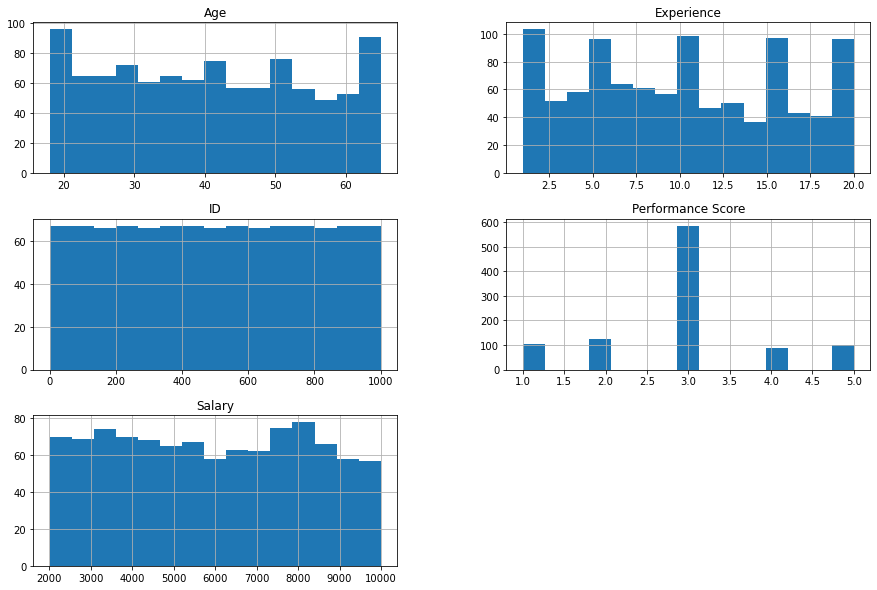

KeyError: "None of [Index(['Performance'], dtype='object')] are in the [columns]"

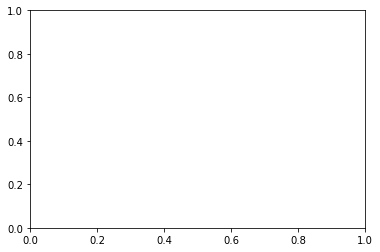

In [23]:
# Exploratory Data Analysis (EDA)
# The purpose of this EDA is to better understand the dataset before applying unsupervised learning algorithms.

# Visualizations:
# We start by visualizing the distribution of key features using histograms and box plots:

import matplotlib.pyplot as plt

# Histograms for numeric features
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plot for performance metric
df.boxplot(column='Performance')  # Adjust column name as needed
plt.show()

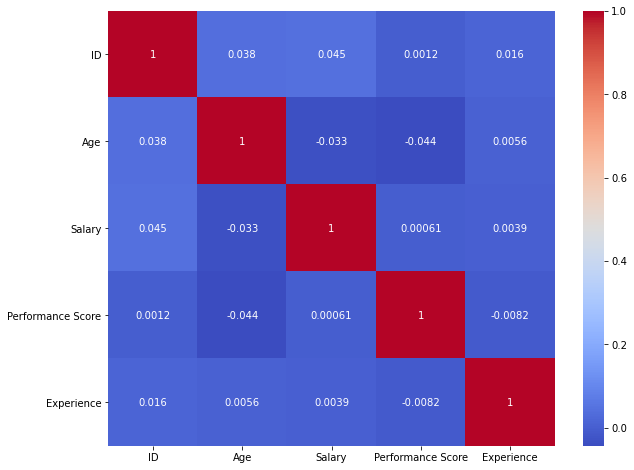

In [24]:
# Correlation Matrix:
# We explore relationships between features:

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# Data Transformation (Scaling)
# Since K-Means is sensitive to the scale of the data, we apply scaling to normalize the numeric features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [26]:
# Model Building: K-Means Clustering
# We apply the K-Means algorithm to group employees into clusters based on their performance and characteristics.

# Model Training:

from sklearn.cluster import KMeans

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

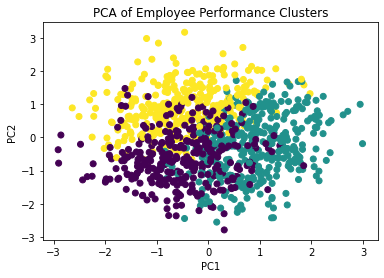

In [27]:
# Visualizing Clusters:
# We use PCA for dimensionality reduction to visualize the clusters in a 2D space:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Plot the results
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.title('PCA of Employee Performance Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

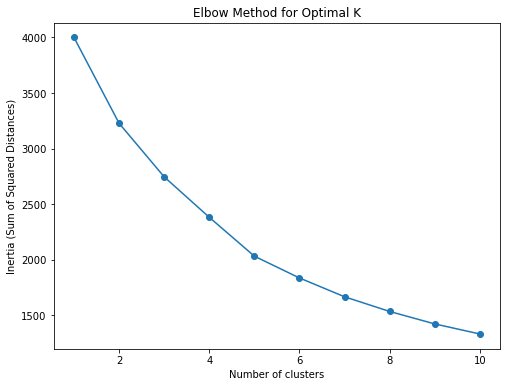

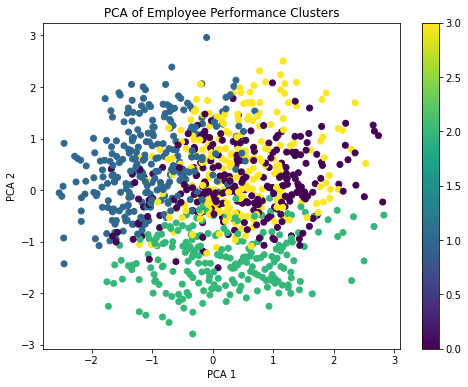

Cluster Centers (Centroids):
[[-0.13032584  0.79725327 -0.04584479 -0.93169828]
 [ 1.01024503 -0.7516175  -0.02938875  0.00363182]
 [-0.03889579  0.91794178 -0.16113947  0.99044341]
 [-0.91465709 -0.81182985  0.21864408  0.09294507]]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it is already available as 'df')
df = pd.read_csv('Employee_Performance_dataset.csv')

# Handle missing values in 'Performance Score'
df['Performance Score'].fillna(df['Performance Score'].mean(), inplace=True)

# Scaling the numerical features
numeric_cols = ['Age', 'Salary', 'Performance Score', 'Experience']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# Elbow Method to determine the optimal number of clusters
def perform_kmeans(df_scaled, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.show()

# Perform the elbow method to find the optimal K
perform_kmeans(df_scaled)

# Perform K-Means clustering with an optimal number of clusters (4 for now)
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans_model.labels_

# Perform PCA for visualization
def perform_pca_and_plot(df_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(df_scaled)
    pca_df = pd.DataFrame(data=pca_components, columns=[f'PCA{i+1}' for i in range(n_components)])
    pca_df['Cluster'] = df['Cluster']
    
    # Plot the PCA components with clusters
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
    plt.title('PCA of Employee Performance Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(scatter)
    plt.show()

# Perform PCA and visualize the clusters
perform_pca_and_plot(df_scaled)

# Print the centroids of the KMeans model
print("Cluster Centers (Centroids):")
print(kmeans_model.cluster_centers_)


In [28]:
# Results and Analysis
# After applying the K-Means algorithm, we analyze the clustering results:

# The dataset was divided into 3 clusters.
# Each cluster represents a distinct group of employees with similar performance characteristics.
# Evaluation Metrics:
# Since this is an unsupervised learning task, we use visualization and cluster analysis (e.g., the silhouette score or cluster centers) to assess the quality of the clustering:

from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.14591961213673368


In [ ]:
#Conclusion
#Based on the clustering results, we can conclude that the K-Means algorithm successfully grouped employees into 3 clusters based on their performance and characteristics. However, further tuning and additional unsupervised models such as DBSCAN or Hierarchical Clustering could be explored to improve the clustering accuracy.